In [86]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [88]:
data=pd.read_csv('train.csv')
test_df=pd.read_csv(r'test.csv')

In [89]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [90]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

### Displaying basic details of the dataset

In [91]:
data.shape

(7352, 563)

In [92]:
data.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [94]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [95]:
pd.crosstab(data.subject,data.Activity,  values=data.Activity, aggfunc='count',
                                     normalize=False,margins=True)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [96]:
# Check whether there are any missing values 
print('Count of train null values {} Count of test null values {}'.format(data.isnull().sum().sum(),test_df.isnull().sum().sum() ) )

Count of train null values 0 Count of test null values 0


In [97]:
## main names of columns
data.columns.str.split('-').str[0].unique().tolist()

['tBodyAcc',
 'tGravityAcc',
 'tBodyAccJerk',
 'tBodyGyro',
 'tBodyGyroJerk',
 'tBodyAccMag',
 'tGravityAccMag',
 'tBodyAccJerkMag',
 'tBodyGyroMag',
 'tBodyGyroJerkMag',
 'fBodyAcc',
 'fBodyAccJerk',
 'fBodyGyro',
 'fBodyAccMag',
 'fBodyBodyAccJerkMag',
 'fBodyBodyGyroMag',
 'fBodyBodyGyroJerkMag',
 'angle(tBodyAccMean,gravity)',
 'angle(tBodyAccJerkMean),gravityMean)',
 'angle(tBodyGyroMean,gravityMean)',
 'angle(tBodyGyroJerkMean,gravityMean)',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)',
 'subject',
 'Activity']

### Data Visualizations

In [98]:

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

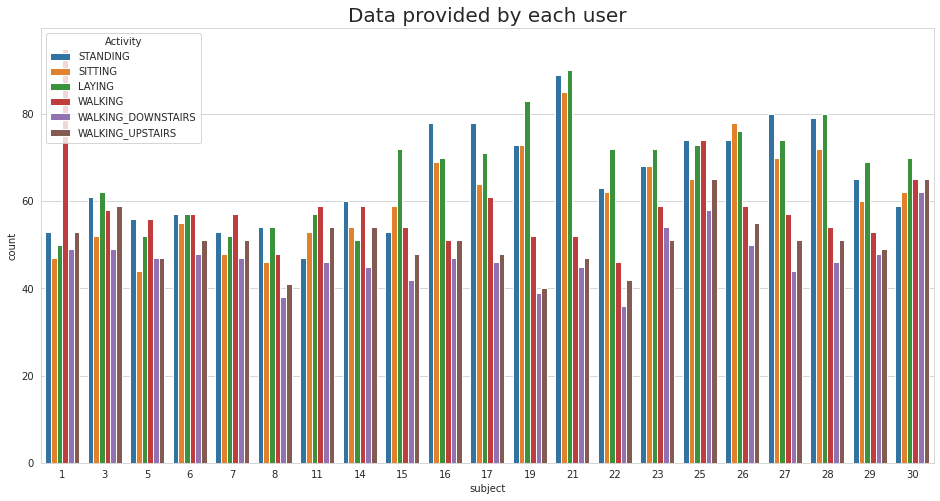

In [99]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = data)
plt.show()

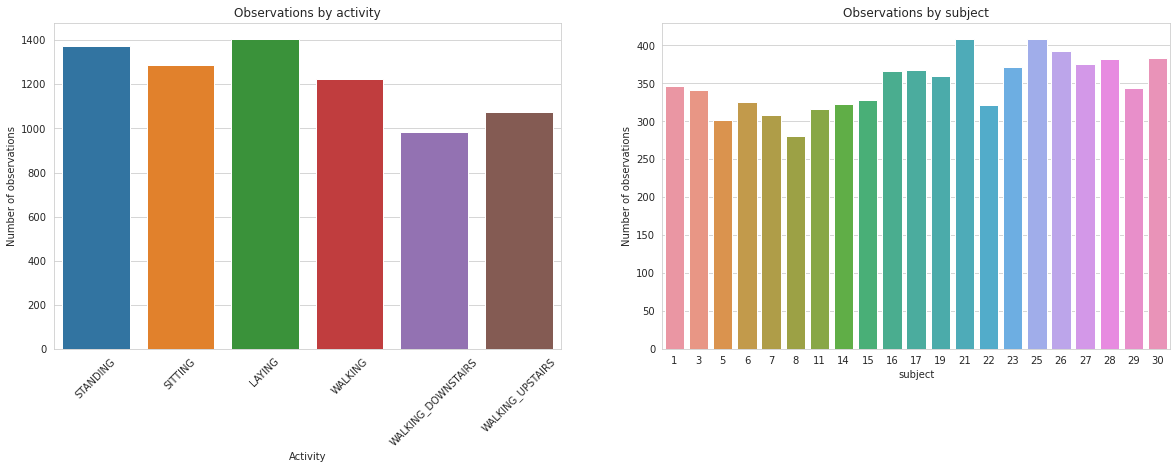

In [100]:
fig, ax = plt.subplots(ncols=2, figsize = (20,6))
 
sns.countplot(data['Activity'], ax=ax[0])
sns.countplot(data['subject'], ax=ax[1])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Number of observations')
ax[0].set_title('Observations by activity')
ax[1].set_ylabel('Number of observations')
ax[1].set_title('Observations by subject')
 
plt.show()

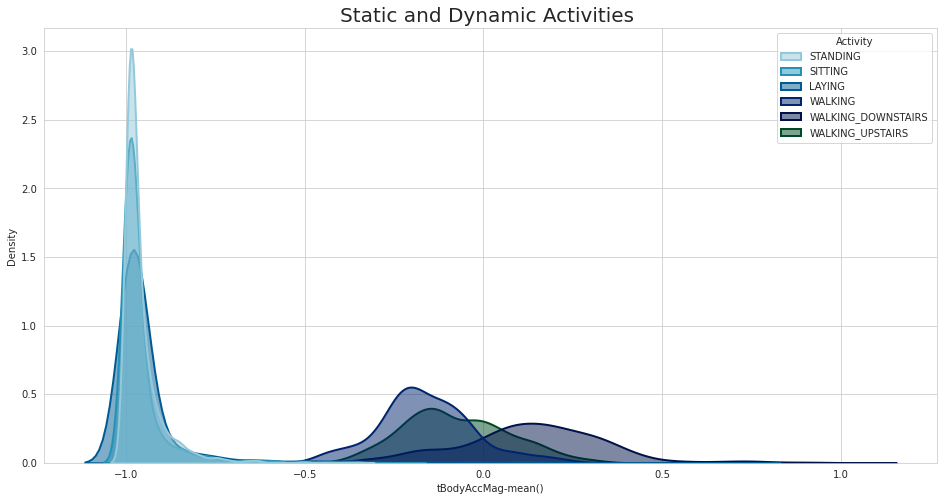

In [101]:

plt.figure(figsize=(16,8))
plt.title('Static and Dynamic Activities ', fontsize=20)

sns.kdeplot(data=data,x='tBodyAccMag-mean()', hue='Activity',fill= True,common_norm=True, palette="ocean_r",
   alpha=.5, linewidth=2)
plt.show()


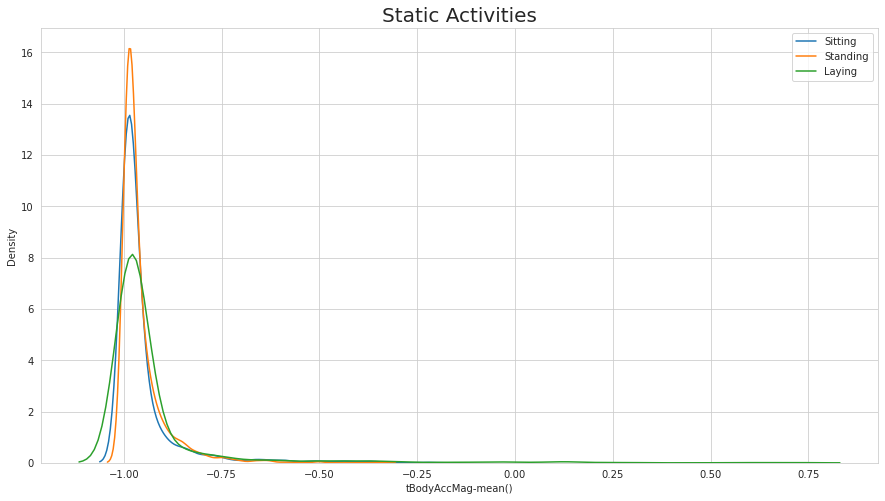

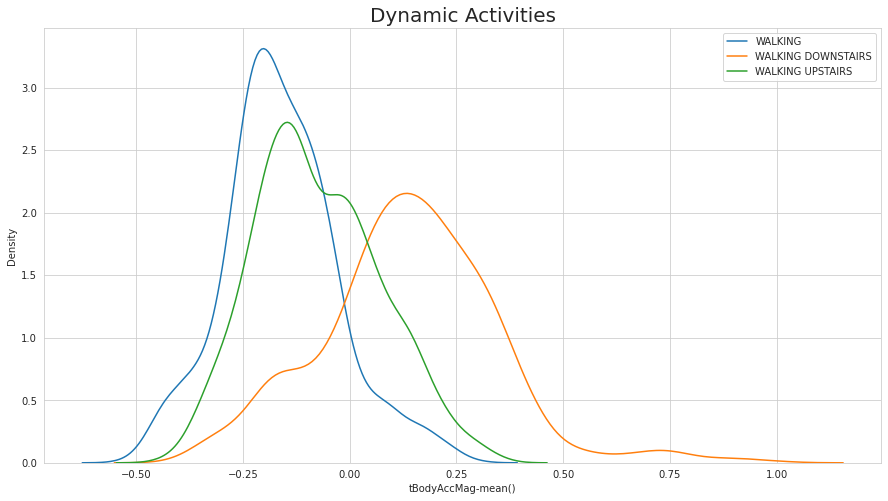

In [102]:
plt.figure(figsize=(15,8))
plt.title("Static Activities",fontsize=20)
sns.kdeplot(data=data[data["Activity"]=="SITTING"],x='tBodyAccMag-mean()', label = 'Sitting')
sns.kdeplot(data=data[data["Activity"]=="STANDING"],x='tBodyAccMag-mean()',label = 'Standing')
sns.kdeplot(data=data[data["Activity"]=="LAYING"],x='tBodyAccMag-mean()', label = 'Laying')
plt.legend()
plt.show()
#plt.axis([-1.02, -0.5, 0, 35])
plt.figure(figsize=(15,8))
plt.title("Dynamic Activities",fontsize=20)
sns.kdeplot(data=data[data["Activity"]=="WALKING"],x='tBodyAccMag-mean()', label = 'WALKING')
sns.kdeplot(data=data[data["Activity"]=="WALKING_DOWNSTAIRS"],x='tBodyAccMag-mean()',label = 'WALKING DOWNSTAIRS')
sns.kdeplot(data=data[data["Activity"]=="WALKING_UPSTAIRS"],x='tBodyAccMag-mean()', label = 'WALKING UPSTAIRS')
plt.legend()
plt.show()

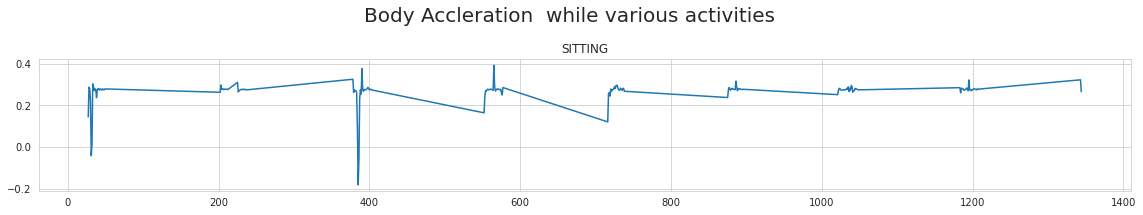

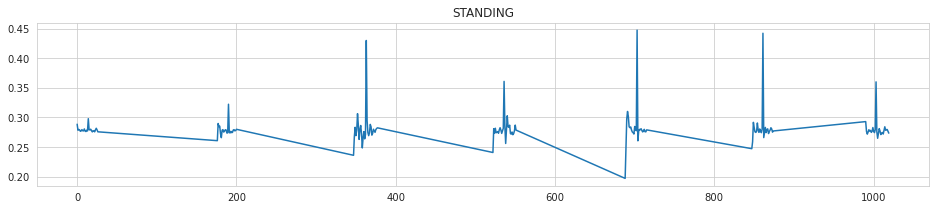

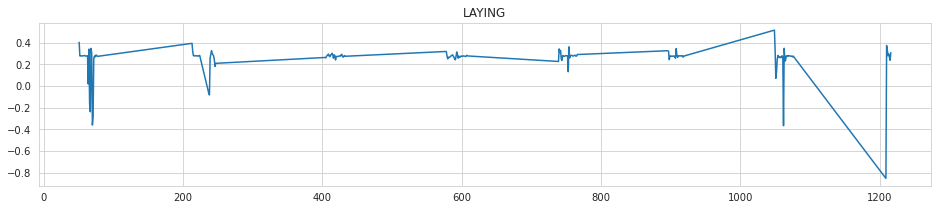

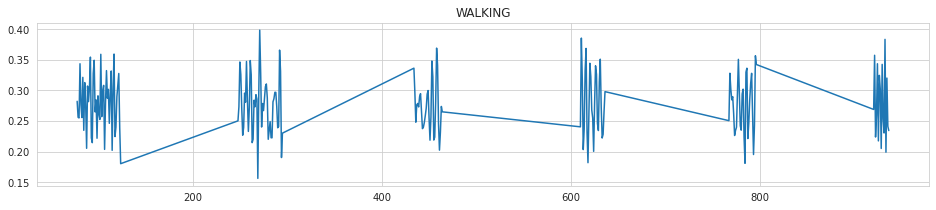

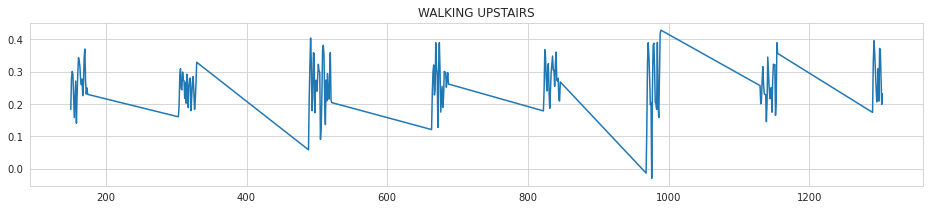

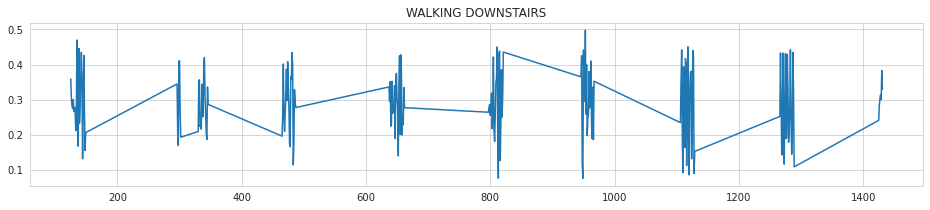

In [103]:
plt.suptitle('Body Accleration  while various activities ',fontsize=20)
dataup=data[data["Activity"]=="SITTING"]
dataup[:200]['tBodyAcc-mean()-X'].plot( figsize = (16,3), title = 'SITTING')
plt.tight_layout()
plt.show()

dataup=data[data["Activity"]=="STANDING"]
dataup[:200]['tBodyAcc-mean()-X'].plot( figsize = (16,3), title = 'STANDING')
plt.show()

datalay=data[data["Activity"]=="LAYING"]
datalay[:200]['tBodyAcc-mean()-X'].plot( figsize = (16,3), title = 'LAYING')
plt.show()

dataW=data[data["Activity"]=="WALKING"]
dataW[:200]['tBodyAcc-mean()-X'].plot( figsize = (16,3), title = 'WALKING')
plt.show()

dataup=data[data["Activity"]=="WALKING_UPSTAIRS"]
dataup[:200]['tBodyAcc-mean()-X'].plot( figsize = (16,3), title = 'WALKING UPSTAIRS')
plt.show()

data1=data[data["Activity"]=="WALKING_DOWNSTAIRS"]
data1[:200]['tBodyAcc-mean()-X'].plot( figsize = (16,3), title = 'WALKING DOWNSTAIRS')
plt.show()

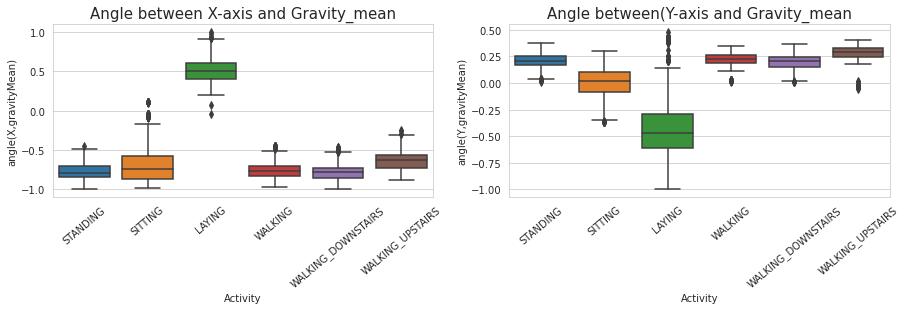

In [104]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data = data)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = data)
plt.title('Angle between(Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

<Figure size 432x288 with 0 Axes>

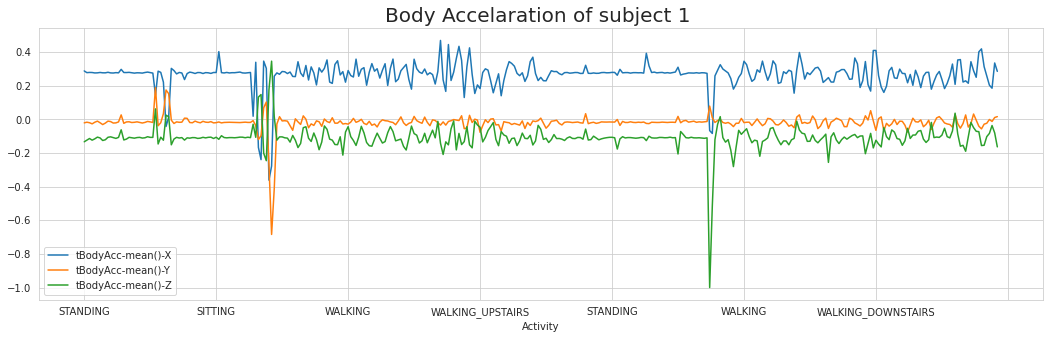

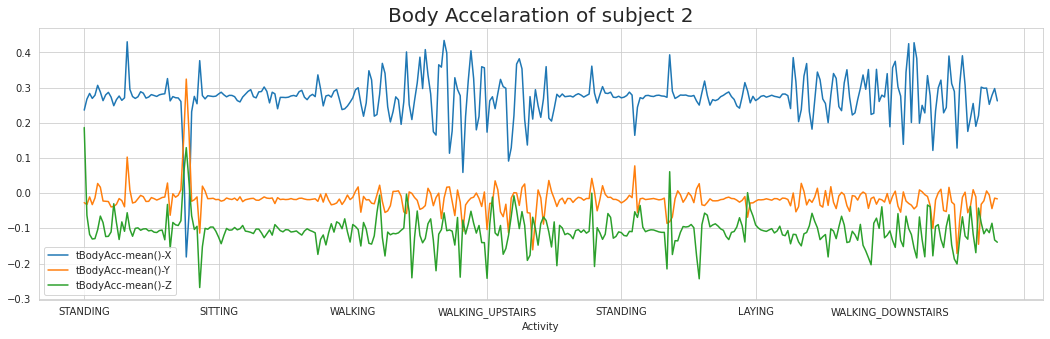

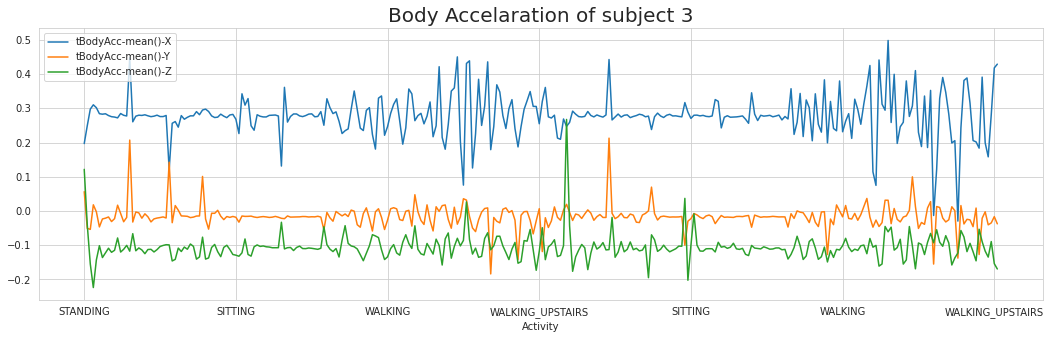

In [175]:
d1=data[data['subject']==1]
plt.figure()
d1.plot(x='Activity',y=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z'],figsize=(18,5))
plt.title('Body Accelaration of subject 1 ',fontsize=20)
d3=data[data['subject']==3]
d3.plot(x='Activity',y=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z'],figsize=(18,5))
plt.title('Body Accelaration of subject 2',fontsize=20)
d4=data[data['subject']==5]
d4.plot(x='Activity',y=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z'],figsize=(18,5))
plt.title('Body Accelaration of subject 3',fontsize=20)
plt.show()

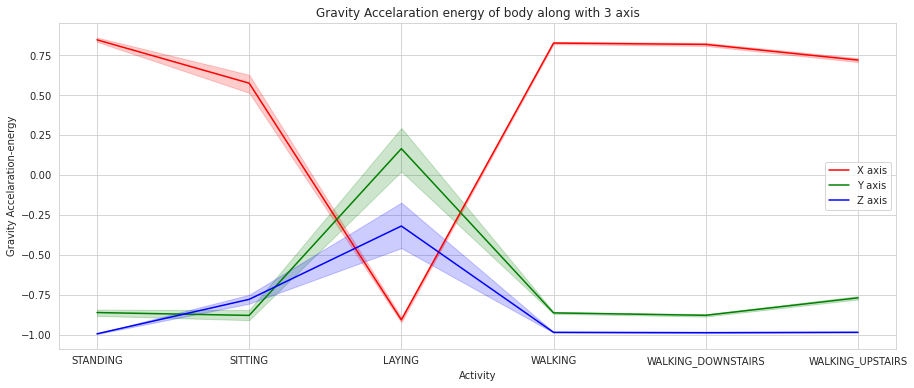

In [106]:
plt.figure(figsize=(15,6))
sns.lineplot(data=d1, x='Activity', y='tGravityAcc-energy()-X',label='X axis',color='red')
sns.lineplot(data=d1, x='Activity', y='tGravityAcc-energy()-Y',label='Y axis',color='green')
sns.lineplot(data=d1, x='Activity', y='tGravityAcc-energy()-Z',label='Z axis',color='blue')
plt.ylabel('Gravity Accelaration-energy')
plt.title('Gravity Accelaration energy of body along with 3 axis')

plt.legend()
plt.show()

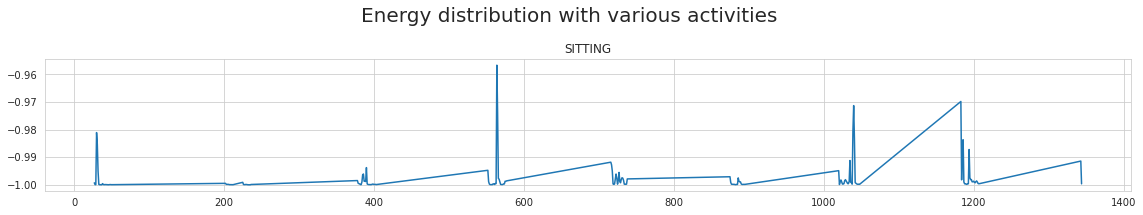

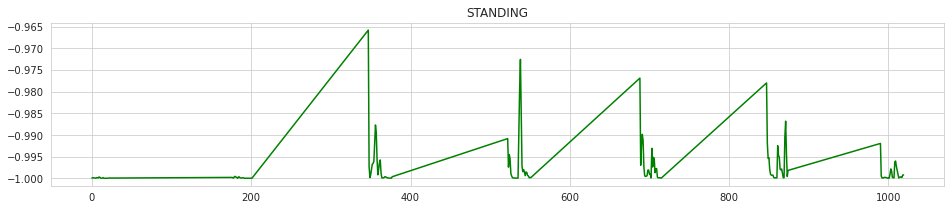

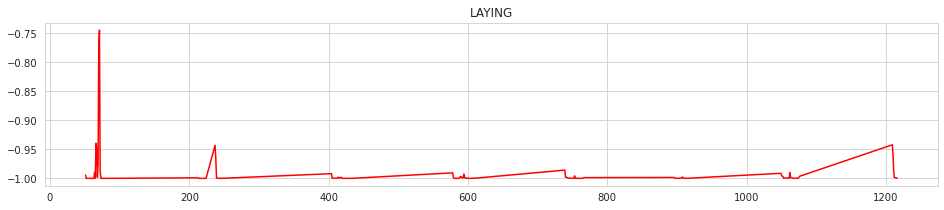

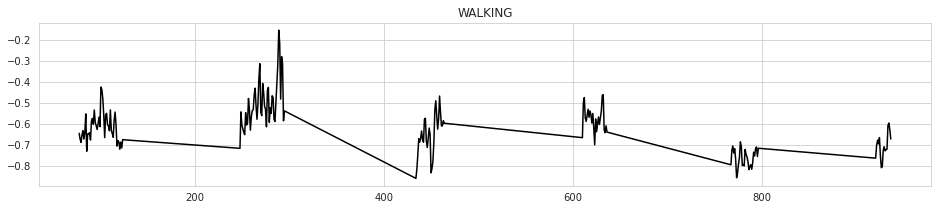

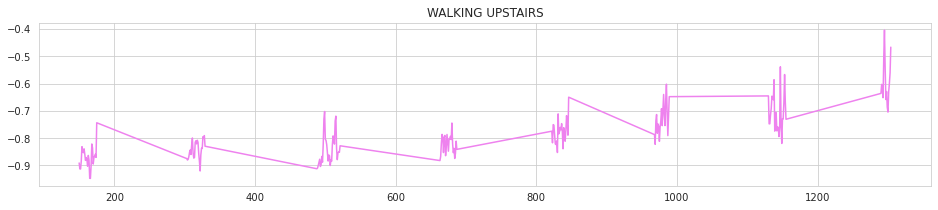

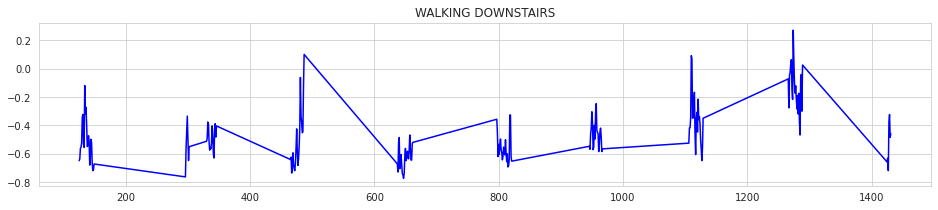

In [107]:
plt.suptitle('Energy distribution with various activities ',fontsize=20)
dataup=data[data["Activity"]=="SITTING"]
dataup[:200]['fBodyBodyAccJerkMag-energy()'].plot(kind='line' ,figsize = (16,3), title = 'SITTING')
plt.tight_layout()
plt.show()
dataup=data[data["Activity"]=="STANDING"]
dataup[:200]['fBodyBodyAccJerkMag-energy()'].plot( figsize = (16,3), title = 'STANDING',color='green')
plt.show()
datalay=data[data["Activity"]=="LAYING"]
datalay[:200]['fBodyBodyAccJerkMag-energy()'].plot( figsize = (16,3), title = 'LAYING',color='red')
plt.show()

dataW=data[data["Activity"]=="WALKING"]
dataW[:200]['fBodyBodyAccJerkMag-energy()'].plot( figsize = (16,3), title = 'WALKING',color='black')
plt.show()

dataup=data[data["Activity"]=="WALKING_UPSTAIRS"]
dataup[:200]['fBodyBodyAccJerkMag-energy()'].plot( figsize = (16,3), title = 'WALKING UPSTAIRS',color='violet')
plt.show()

data1=data[data["Activity"]=="WALKING_DOWNSTAIRS"]
data1[:200]['fBodyBodyAccJerkMag-energy()'].plot( figsize = (16,3), title = 'WALKING DOWNSTAIRS',color='blue')
plt.show()

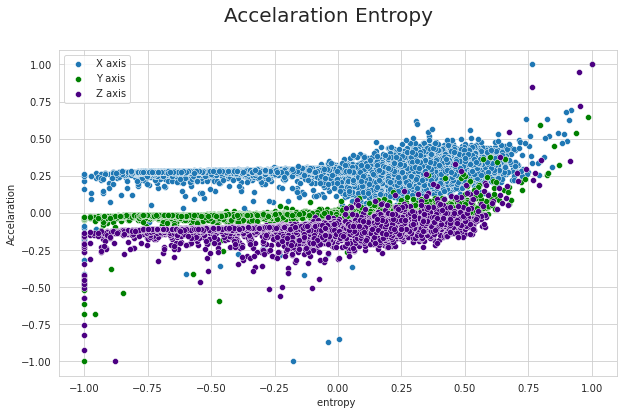

In [108]:
plt.figure(figsize=(10,6))
plt.suptitle('Accelaration Entropy',fontsize=20)

sns.scatterplot(data=data, x='tBodyAcc-entropy()-X', y='tBodyAcc-mean()-X',label='X axis')
sns.scatterplot(data=data, x='tBodyAcc-entropy()-Y', y='tBodyAcc-mean()-Y',label='Y axis', color='green')
sns.scatterplot(data=data, x='tBodyAcc-entropy()-Z', y='tBodyAcc-mean()-Z',label='Z axis',color='indigo')
plt.ylabel('Accelaration')
plt.xlabel('entropy ')

plt.legend()
plt.show()

In [109]:
gyro=[x for x in data.columns if  'gravity' in x]

gyro

['angle(tBodyAccMean,gravity)',
 'angle(tBodyAccJerkMean),gravityMean)',
 'angle(tBodyGyroMean,gravityMean)',
 'angle(tBodyGyroJerkMean,gravityMean)',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)']

## pre processing

### checking for missing values

In [110]:
data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [111]:
#no missing values found

In [112]:
data.select_dtypes('object').columns

Index(['Activity'], dtype='object')

### splitting the dataset 


In [113]:
X = data.drop(['Activity','subject'], axis=1)

y=data["Activity"]

In [114]:
X_test = test_df.drop(['Activity','subject'], axis=1)

y_test2=test_df["Activity"]

In [115]:
X.shape

(7352, 561)

In [116]:
y.shape

(7352,)

In [117]:
type(y)

pandas.core.series.Series

## Transforming non numerical labels into numerical labels

In [118]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [119]:
# encoding train labels 
encoder.fit(y)
y_encoded = encoder.transform(y)
y_encoded.shape

(7352,)

In [120]:
y_test_encoded = encoder.transform(y_test2)
y_test_encoded.shape

(2947,)

In [121]:
y_test_encoded

array([2, 2, 2, ..., 5, 5, 5])

In [122]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

# Principal Component Analysis (PCA)

In [123]:
#Since the number of features are too high, we are doing PCA to automatically idenfify the features 
#that are having maximum variance

In [124]:
#Before performing PCA, we need to ensure all the features are of similar dimension, so we will use Standard Scalar function
# Scaling the feature 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
X= scaler.fit_transform(X)
X_test= scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(0.98)

pca.fit(X)

train_x_pca = pca.transform(X)

print(pca.n_components_)
print(pca.explained_variance_)


#performing PCA




148
[2.84921131e+02 3.69226384e+01 1.57462521e+01 1.40490858e+01
 1.05947200e+01 9.67299169e+00 7.69242064e+00 6.72774087e+00
 5.58753186e+00 5.41487229e+00 4.82554611e+00 4.49018687e+00
 4.28660268e+00 3.62078775e+00 3.54782215e+00 3.36489861e+00
 3.29211698e+00 3.22847460e+00 3.18647049e+00 2.95853173e+00
 2.80741787e+00 2.74034389e+00 2.68309940e+00 2.62899563e+00
 2.52085563e+00 2.36228414e+00 2.34517939e+00 2.27555929e+00
 2.17991709e+00 2.17146658e+00 2.05330859e+00 1.98931505e+00
 1.95222356e+00 1.89187701e+00 1.84973956e+00 1.84153691e+00
 1.79841499e+00 1.65862541e+00 1.60873157e+00 1.59948577e+00
 1.50798419e+00 1.49033012e+00 1.47790862e+00 1.45234939e+00
 1.39738790e+00 1.38560059e+00 1.35039799e+00 1.32478577e+00
 1.29204013e+00 1.27682592e+00 1.23529198e+00 1.19771269e+00
 1.16538051e+00 1.13616058e+00 1.12091513e+00 1.10953192e+00
 1.09002331e+00 1.06737565e+00 1.05518756e+00 1.04481370e+00
 1.01816580e+00 9.95242708e-01 9.87971646e-01 9.72254971e-01
 9.57972262e-01 9.45

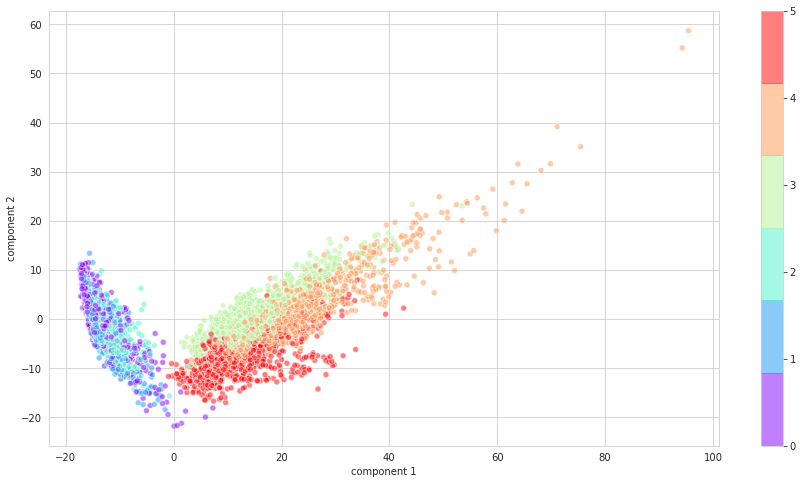

In [126]:
plt.figure(figsize=(15,8))

plt.scatter(train_x_pca[:, 0], train_x_pca[:, 1],
            edgecolor='white', alpha=0.5,c= y_encoded,
            cmap=plt.cm.get_cmap('rainbow', 6))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [127]:

test_x_pca = pca.transform(X_test)

print(pca.n_components_)
print(pca.explained_variance_)

148
[2.84921131e+02 3.69226384e+01 1.57462521e+01 1.40490858e+01
 1.05947200e+01 9.67299169e+00 7.69242064e+00 6.72774087e+00
 5.58753186e+00 5.41487229e+00 4.82554611e+00 4.49018687e+00
 4.28660268e+00 3.62078775e+00 3.54782215e+00 3.36489861e+00
 3.29211698e+00 3.22847460e+00 3.18647049e+00 2.95853173e+00
 2.80741787e+00 2.74034389e+00 2.68309940e+00 2.62899563e+00
 2.52085563e+00 2.36228414e+00 2.34517939e+00 2.27555929e+00
 2.17991709e+00 2.17146658e+00 2.05330859e+00 1.98931505e+00
 1.95222356e+00 1.89187701e+00 1.84973956e+00 1.84153691e+00
 1.79841499e+00 1.65862541e+00 1.60873157e+00 1.59948577e+00
 1.50798419e+00 1.49033012e+00 1.47790862e+00 1.45234939e+00
 1.39738790e+00 1.38560059e+00 1.35039799e+00 1.32478577e+00
 1.29204013e+00 1.27682592e+00 1.23529198e+00 1.19771269e+00
 1.16538051e+00 1.13616058e+00 1.12091513e+00 1.10953192e+00
 1.09002331e+00 1.06737565e+00 1.05518756e+00 1.04481370e+00
 1.01816580e+00 9.95242708e-01 9.87971646e-01 9.72254971e-01
 9.57972262e-01 9.45

In [128]:
# How much of the variance did we capture? 
total_var=pca.explained_variance_ratio_.sum()*100

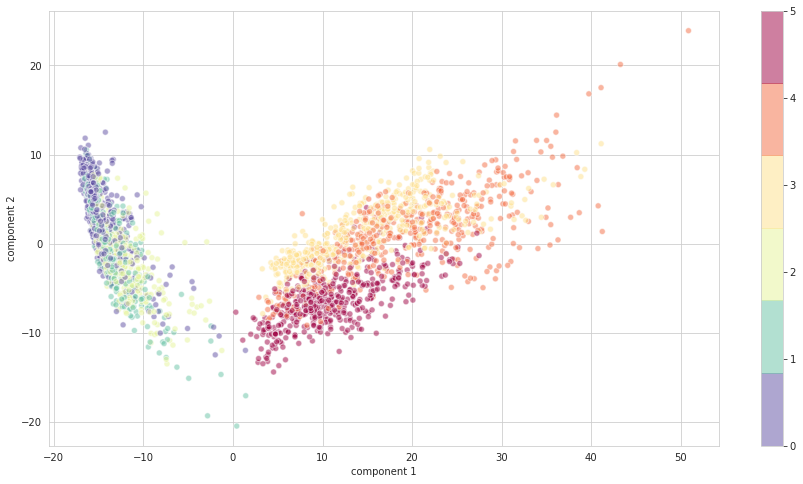

In [130]:
plt.figure(figsize=(15,8))

plt.scatter(test_x_pca[:, 0], test_x_pca[:, 1],
            edgecolor='white', alpha=0.5,c= y_test_encoded,
            cmap=plt.cm.get_cmap('Spectral_r', 6))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_x_pca,y,test_size=0.2,random_state=42)



## Building Models

### Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
logit_model = LogisticRegression(penalty='l2',solver='lbfgs',class_weight='balanced',max_iter=40)
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

In [133]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.94      0.94       262
          STANDING       0.94      0.94      0.94       276
           WALKING       0.98      0.99      0.99       247
WALKING_DOWNSTAIRS       0.99      0.99      0.99       206
  WALKING_UPSTAIRS       0.98      0.97      0.98       200

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



In [134]:
confusion_matrix(y_test,y_pred)

array([[280,   0,   0,   0,   0,   0],
       [  0, 246,  16,   0,   0,   0],
       [  0,  17, 259,   0,   0,   0],
       [  0,   0,   0, 244,   0,   3],
       [  0,   0,   0,   1, 204,   1],
       [  0,   0,   0,   3,   2, 195]], dtype=int64)

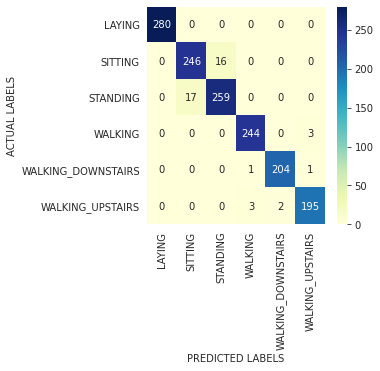

In [135]:
LABELS=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="YlGnBu");
plt.ylabel('ACTUAL LABELS')
plt.xlabel('PREDICTED LABELS')
plt.show();


### KNN

In [136]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [137]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

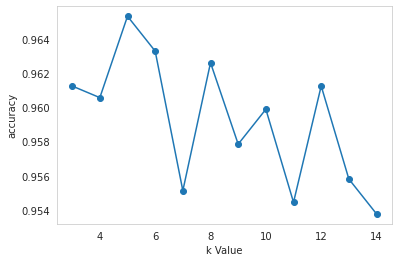

In [138]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [139]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [140]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.89      0.92       262
          STANDING       0.90      0.95      0.93       276
           WALKING       0.98      1.00      0.99       247
WALKING_DOWNSTAIRS       0.99      0.97      0.98       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



In [141]:
confusion_matrix(y_test,y_pred)

array([[280,   0,   0,   0,   0,   0],
       [  0, 233,  29,   0,   0,   0],
       [  0,  13, 263,   0,   0,   0],
       [  0,   0,   0, 246,   1,   0],
       [  0,   0,   0,   5, 200,   1],
       [  0,   0,   0,   1,   1, 198]], dtype=int64)

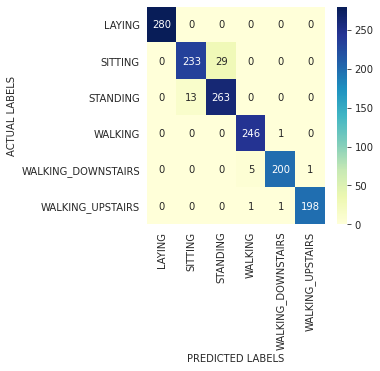

In [142]:
LABELS=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="YlGnBu");
plt.ylabel('ACTUAL LABELS')
plt.xlabel('PREDICTED LABELS')
plt.show();

### SVM

In [143]:
from sklearn.svm import SVC
sm = SVC(kernel='linear', gamma=10,random_state=100,max_iter=-1)
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.93      0.94      0.94       262
          STANDING       0.95      0.93      0.94       276
           WALKING       0.99      0.99      0.99       247
WALKING_DOWNSTAIRS       0.99      1.00      0.99       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



In [145]:
confusion_matrix(y_test,y_pred)

array([[280,   0,   0,   0,   0,   0],
       [  0, 247,  15,   0,   0,   0],
       [  0,  18, 258,   0,   0,   0],
       [  0,   0,   0, 245,   0,   2],
       [  0,   0,   0,   1, 205,   0],
       [  0,   0,   0,   1,   2, 197]], dtype=int64)

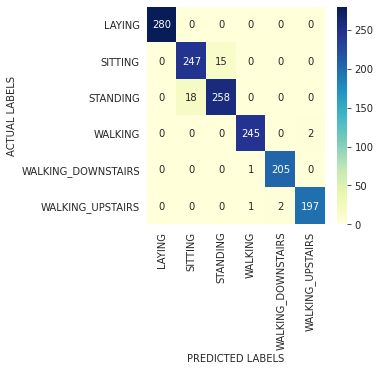

In [146]:
LABELS=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="YlGnBu");
plt.ylabel('ACTUAL LABELS')
plt.xlabel('PREDICTED LABELS')
plt.show();

## Decision Tree model

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [148]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.95      0.92      0.94       280
           SITTING       0.64      0.65      0.64       262
          STANDING       0.71      0.72      0.72       276
           WALKING       0.82      0.85      0.83       247
WALKING_DOWNSTAIRS       0.85      0.79      0.82       206
  WALKING_UPSTAIRS       0.80      0.82      0.81       200

          accuracy                           0.79      1471
         macro avg       0.79      0.79      0.79      1471
      weighted avg       0.79      0.79      0.79      1471



In [149]:
confusion_matrix(y_test,y_pred)

array([[258,  21,   1,   0,   0,   0],
       [ 12, 169,  81,   0,   0,   0],
       [  1,  75, 200,   0,   0,   0],
       [  0,   0,   0, 209,  12,  26],
       [  0,   0,   0,  28, 162,  16],
       [  0,   0,   0,  19,  17, 164]], dtype=int64)

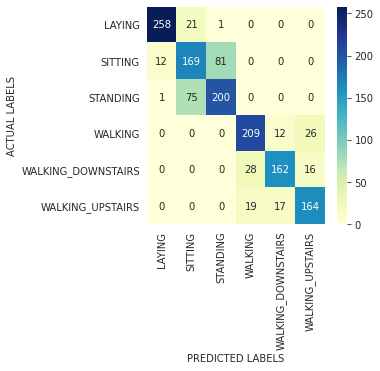

In [150]:
LABELS=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="YlGnBu");
plt.ylabel('ACTUAL LABELS')
plt.xlabel('PREDICTED LABELS')
plt.show();

### Random forest model

In [151]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       280
           SITTING       0.92      0.83      0.87       262
          STANDING       0.86      0.93      0.89       276
           WALKING       0.95      0.98      0.97       247
WALKING_DOWNSTAIRS       0.98      0.92      0.95       206
  WALKING_UPSTAIRS       0.92      0.95      0.94       200

          accuracy                           0.93      1471
         macro avg       0.94      0.93      0.93      1471
      weighted avg       0.93      0.93      0.93      1471



In [153]:
confusion_matrix(y_test,y_pred)

array([[278,   1,   1,   0,   0,   0],
       [  4, 217,  41,   0,   0,   0],
       [  0,  19, 257,   0,   0,   0],
       [  0,   0,   0, 242,   2,   3],
       [  0,   0,   0,   4, 189,  13],
       [  0,   0,   0,   8,   2, 190]], dtype=int64)

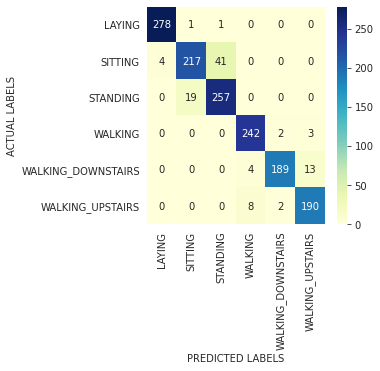

In [154]:
LABELS=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="YlGnBu");
plt.ylabel('ACTUAL LABELS')
plt.xlabel('PREDICTED LABELS')
plt.show();

### Gaussian Naïve Bayes Classifier

In [155]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [156]:
y_pred = nb.predict(X_test)
y_pred

array(['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', ...,
       'SITTING', 'STANDING', 'SITTING'], dtype='<U18')

In [157]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.95      0.84      0.89       280
           SITTING       0.79      0.70      0.74       262
          STANDING       0.81      0.86      0.84       276
           WALKING       0.85      0.81      0.83       247
WALKING_DOWNSTAIRS       0.58      0.63      0.61       206
  WALKING_UPSTAIRS       0.71      0.86      0.78       200

          accuracy                           0.79      1471
         macro avg       0.78      0.78      0.78      1471
      weighted avg       0.80      0.79      0.79      1471



In [158]:
confusion_matrix(y_pred,y_test)

array([[234,   7,   5,   0,   0,   0],
       [ 26, 184,  22,   0,   0,   0],
       [  0,  55, 238,   0,   0,   0],
       [  1,   1,   3, 200,  28,   3],
       [ 19,  15,   8,  26, 130,  25],
       [  0,   0,   0,  21,  48, 172]], dtype=int64)

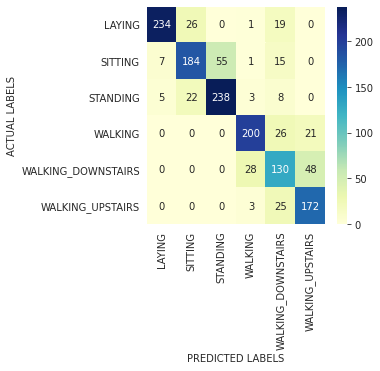

In [159]:
LABELS=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="YlGnBu");
plt.ylabel('ACTUAL LABELS')
plt.xlabel('PREDICTED LABELS')
plt.show();

### Gradient Boost is taking time so blocking the same

# Model Evaluation

In [160]:
# Create a dictionary
classifier_collection = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    
}

In [161]:
from sklearn import metrics
accuracy_score_dict = {}
confusion_matrix_dict = {}
count=0
for classifier_model, classifier in (classifier_collection.items()):
    #print(classifier_name)
    count +=1
    classifier.fit(X_train,y_train)
    predicted = classifier.predict(X_test)
    accuracy_score_dict[classifier_model] = {'accuracy_score' :  metrics.accuracy_score(y_test, predicted)}
    confusion_matrix_dict[classifier_model] = {'matrix' : metrics.confusion_matrix(y_test, predicted)}
    

In [162]:
accuracy_score_dict

{'Decision Tree': {'accuracy_score': 0.7865397688647179},
 'Logistic Regression': {'accuracy_score': 0.9755268524813052},
 'SVM': {'accuracy_score': 0.9762066621346023},
 'Nearest Neighbors': {'accuracy_score': 0.9653297076818491},
 'Naive Bayes': {'accuracy_score': 0.7872195785180149},
 'Random Forest': {'accuracy_score': 0.9360978925900748}}

In [163]:
confusion_matrix_dict

{'Decision Tree': {'matrix': array([[258,  22,   0,   0,   0,   0],
         [ 10, 177,  75,   0,   0,   0],
         [  1,  74, 201,   0,   0,   0],
         [  0,   0,   0, 205,  14,  28],
         [  0,   0,   0,  24, 154,  28],
         [  0,   0,   0,  19,  19, 162]], dtype=int64)},
 'Logistic Regression': {'matrix': array([[280,   0,   0,   0,   0,   0],
         [  0, 247,  15,   0,   0,   0],
         [  0,  13, 263,   0,   0,   0],
         [  0,   0,   0, 244,   0,   3],
         [  0,   0,   0,   1, 205,   0],
         [  0,   0,   0,   1,   3, 196]], dtype=int64)},
 'SVM': {'matrix': array([[280,   0,   0,   0,   0,   0],
         [  0, 246,  16,   0,   0,   0],
         [  0,  15, 261,   0,   0,   0],
         [  0,   0,   0, 246,   0,   1],
         [  0,   0,   0,   1, 205,   0],
         [  0,   0,   0,   1,   1, 198]], dtype=int64)},
 'Nearest Neighbors': {'matrix': array([[280,   0,   0,   0,   0,   0],
         [  0, 233,  29,   0,   0,   0],
         [  0,  13, 263,

# Model Testing against test data

In [164]:
# we will evaluate our model against the test set given 
test_df.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING


In [165]:
test_df.shape

(2947, 563)

In [166]:
y_test_encoded

array([2, 2, 2, ..., 5, 5, 5])

In [167]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [168]:
#prdicting test set with SVM model 

In [169]:
y_test_pred =sm.predict(test_x_pca)

In [170]:
print(classification_report(y_test2, y_test_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.87      0.90       491
          STANDING       0.89      0.94      0.91       532
           WALKING       0.92      0.98      0.95       496
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
  WALKING_UPSTAIRS       0.91      0.91      0.91       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.93      0.93      2947



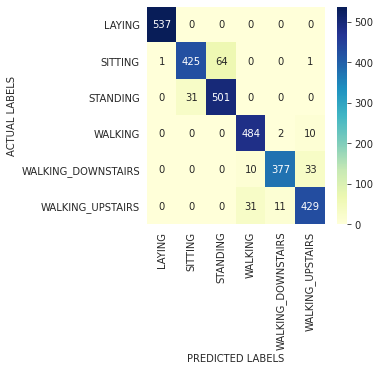

In [171]:
LABELS=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

cm = confusion_matrix(y_test2,y_test_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="YlGnBu");
plt.ylabel('ACTUAL LABELS')
plt.xlabel('PREDICTED LABELS')
plt.show();